In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset using pandas
data = pd.read_csv('pima-data.csv')
data.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


Data Analysis & Visualization

In [3]:
#finding out missing values

data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [4]:
diabetes_map = {True: 1, False: 0}

In [5]:
data['diabetes'] = data['diabetes'].map(diabetes_map)
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [6]:
#checking whether the target value data is balanced or imbalanced

count_diabetes = pd.value_counts(data['diabetes'])
count_diabetes

0    500
1    268
Name: diabetes, dtype: int64

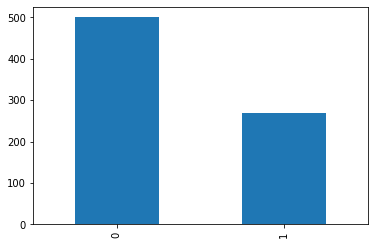

In [7]:
count_diabetes.plot(kind='bar')


In [8]:
#finding the correlation between dependent & independent variables

data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


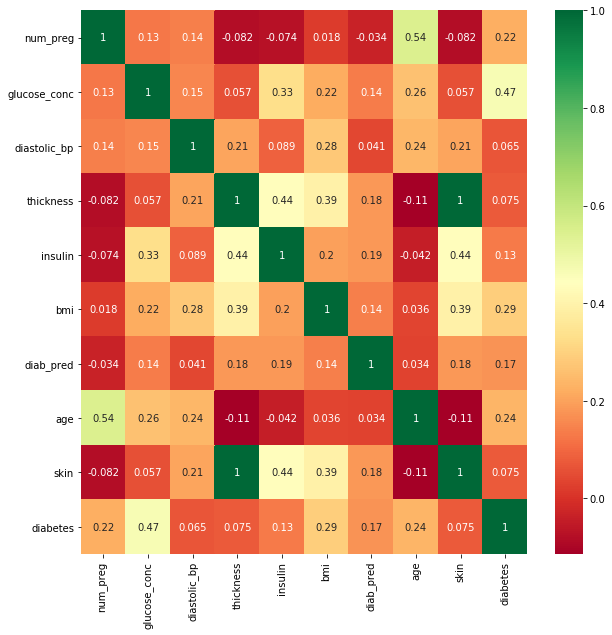

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

FEATURE ENGINEERING

In [10]:
print("number of (0) values present in num_preg: {0}". format(len(data.loc[data['num_preg'] == 0 ])))
print("number of (0) values present in glucose_conc: {0}". format(len(data.loc[data['glucose_conc']==0])))
print("number of (0) values present in diastolic_dp: {0}". format(len(data.loc[data['diastolic_bp']==0])))
print("number of (0) values present in thickness: {0}".format(len(data.loc[data['thickness']== 0 ])))
print("number of (0) values present in insulin:{0}". format(len(data.loc[data['insulin']==0])))
print("number of (0) values present in bmi: {0}". format(len(data.loc[data['bmi']==0])))
print("number of (0) values present in diab_pred: {0}". format(len(data.loc[data['diab_pred']==0])))
print("number of (0) values present in age:{0}". format(len(data.loc[data['age']==0])))
print("number of (0) values present in skin: {0}". format(len(data.loc[data['skin']==0])))

number of (0) values present in num_preg: 111
number of (0) values present in glucose_conc: 5
number of (0) values present in diastolic_dp: 35
number of (0) values present in thickness: 227
number of (0) values present in insulin:374
number of (0) values present in bmi: 11
number of (0) values present in diab_pred: 0
number of (0) values present in age:0
number of (0) values present in skin: 227


In [11]:
#handling missing(0) values
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values = 0, strategy = "mean" )

filled_data = fill_values.fit_transform(data.iloc[:,0:9])

In [12]:
filled_data.shape

(768, 9)

In [13]:
X = pd.DataFrame(data=filled_data, columns=['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age','skin'])
X.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.379000
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,1.142600
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.148645
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.906200
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.379000


In [14]:
Y = data.iloc[:,9:10]
Y.head()

,diabetes
0,1
1,0
2,1
3,0
4,1


In [15]:
#creating the train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y , train_size = 0.70, random_state = 0)

MODEL CREATION

In [17]:
#Training the data with randomforestclassifier

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=200,criterion='entropy')

classifier.fit(X_train, Y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
Y_pred = classifier.predict(X_test)


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(Y_test,Y_pred)
score

0.7662337662337663

In [20]:

print(confusion_matrix(Y_test,Y_pred))


[[137  20]
 [ 34  40]]


In [21]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       157
           1       0.67      0.54      0.60        74

    accuracy                           0.77       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



HYPER PARAMETER TUNING

In [23]:
parameters = {"n_estimators":[100,200,300,400,500,600,700,800,900], "criterion":['gini','entropy'], "max_depth":[2,4,6,8,10,12],
              "min_samples_split":[1,2,4,6,8,10],"min_samples_leaf":[1,2,3,4,5,6,7],"max_features":['auto','sqrt','log2']}
   

    

In [24]:
from sklearn.model_selection import RandomizedSearchCV

random_classifier = RandomForestClassifier()

random_search = RandomizedSearchCV(random_classifier,param_distributions=parameters,n_iter=5,cv=5) 


In [25]:
random_search.fit(X_train,Y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [26]:
random_search.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 4,
 'criterion': 'entropy'}

In [27]:
random_search

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [28]:
best_parameters = random_search.best_estimator_

In [30]:
Y_pred_values = best_parameters.predict(X_test)
print("CONFUSION MATRIX")
print(confusion_matrix(Y_pred_values,Y_test))
print("AccuarcyScore:{}".format(accuracy_score(Y_pred_values,Y_test)))

print("Classification Report")
print(classification_report(Y_pred_values,Y_test))

CONFUSION MATRIX
[[142  42]
 [ 15  32]]
AccuarcyScore:0.7532467532467533
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       184
           1       0.43      0.68      0.53        47

    accuracy                           0.75       231
   macro avg       0.67      0.73      0.68       231
weighted avg       0.81      0.75      0.77       231

